[0.14502829]
0.013227968135046009


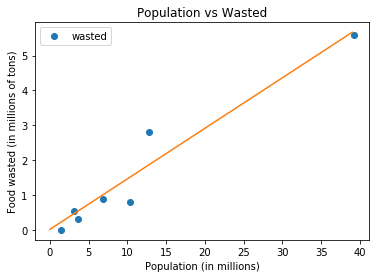

Population in millions here: 12

Food wasted in millions of tons:  [1.75356747]
Food wasted in millions of pounds:  [3.50713494e+09] 

Cereal/Grain Caloric Intake:  [4.76268925e+12]
Roots/Tubers Caloric Intake:  [6.34791424e+11]
Oilseeds and Pulses Caloric Intake:  [7.09844112e+12]
Fruits and Vegetables Caloric Intake:  [5.29577376e+11]
Meat Caloric Intake:  [2.28314485e+12]
Fish and Seafood Caloric Intake:  [3.2721569e+12]
Milk Caloric Intake:  [6.69862774e+11]

Total Caloric Intake:  [1.92506637e+13]
Children population in millions: 6
Adult population in millions: 6

Average caloric intake of this population:  1757.625
Population fed annually in millions:  [2.50060661]


In [24]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
dataset = pd.read_csv('food_waste.csv')  

X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    dataset.plot(x='population', y='wasted', style='o')  
    plt.title('Population vs Wasted')  
    plt.xlabel('Population (in millions)')  
    plt.ylabel('Food wasted (in millions of tons)') 
    plt.plot(x, y)  
    plt.show()
    
graph('0.013227968135046009 + 0.14502829*x', range(0, 40))
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

userx = int(input('Population in millions here: '))
prediction[0] = regressor.predict(userx)

print('\nFood wasted in millions of tons: ', prediction)

poundprediction = prediction * (10**6) * 2000

print('Food wasted in millions of pounds: ', poundprediction, '\n')

graincal = poundprediction * 1358
print('Cereal/Grain Caloric Intake: ', graincal)

rootcal = poundprediction * 181
print('Roots/Tubers Caloric Intake: ', rootcal)

oilcal = poundprediction * 2024
print('Oilseeds and Pulses Caloric Intake: ', oilcal)

fruitcal = poundprediction * 151
print('Fruits and Vegetables Caloric Intake: ', fruitcal)

meatcal = poundprediction * 651
print('Meat Caloric Intake: ', meatcal)

fishcal = poundprediction * 933
print('Fish and Seafood Caloric Intake: ', fishcal)

milkcal = poundprediction * 191
print('Milk Caloric Intake: ', milkcal)

totalcal = graincal + rootcal + oilcal + fruitcal + meatcal + fishcal + milkcal
print('\nTotal Caloric Intake: ', totalcal)

childpop = int(input('Children population in millions: '))
adultpop = int(input('Adult population in millions: '))


averagecalories = (childpop/(childpop + adultpop))*(1515.25) + (adultpop/(childpop + adultpop))*(2000)
peoplefed = (totalcal/(averagecalories * 365))/((childpop + adultpop)*(10**6))

print('\nAverage caloric intake of this population: ', averagecalories)
print('Population fed annually in millions: ', peoplefed)